In [2]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


# ATIVIDADE PRÁTICA - PRÉ-PROCESSAMENTO E SELEÇÃO DE CARACTERÍSTICAS: ROC
---

##  1) Pré-processamento de características. Na aula de hoje, vimos os procedimentos de remoção de outliers e de normalização do espaço de características. Nesta atividade, vamos garantir que compreendemos o que está envolvido nestes processos. Para isso, vamos utilizar funções que estão disponíveis no material do Moodle e que realizam este pré-processamento: em python, preprocess.py; em matlab, remoutliers.m, normaliza.m e preselec.m.

In [3]:
dados1 = loadmat('../data/pratica_3/Dados1.mat').get('sinal')
dados2 = loadmat('../data/pratica_3/Dados2.mat')

In [4]:
from functions.pratica_3 import remoutliers, normaliza, preselec


## Testando remoção de outliers utilizando desvio padrão

In [5]:
remoutliers(dados1, 3, method='desvio')

[31, 68, 174, 210]

## Testando remoção de outliers utilizando quartis

In [6]:
remoutliers(dados1, 3, method='quartis')

[31, 68, 174, 210]

Teste a normalização nos dados do arquivo “Dados2.mat” disponível no
moodle desta aula. Este arquivo possui medidas histopatológicas de duas
classes distintas de astrocitomas (alto grau e baixo grau). As características
no arquivo correspondem às médias (variável “med”) e às obliquidades
(variável “ske”) dos tons de cinza das imagens. Cada uma dessas variáveis
contém 5 padrões para cada classe (as matrizes possuem a dimensão N x C,
onde N=5 é o número de padrões e C=2 é o número de classes). Teste
diferentes métodos de normalização em tais dados e plote as diferentes
classes no espaço das características.

In [7]:
med = dados2.get('med')
ske = dados2.get('ske')

## Normalização Linear

In [8]:
med_norm = normaliza(med, metodo='linear')

Text(0, 0.5, 'Obliquidade Normalizada')

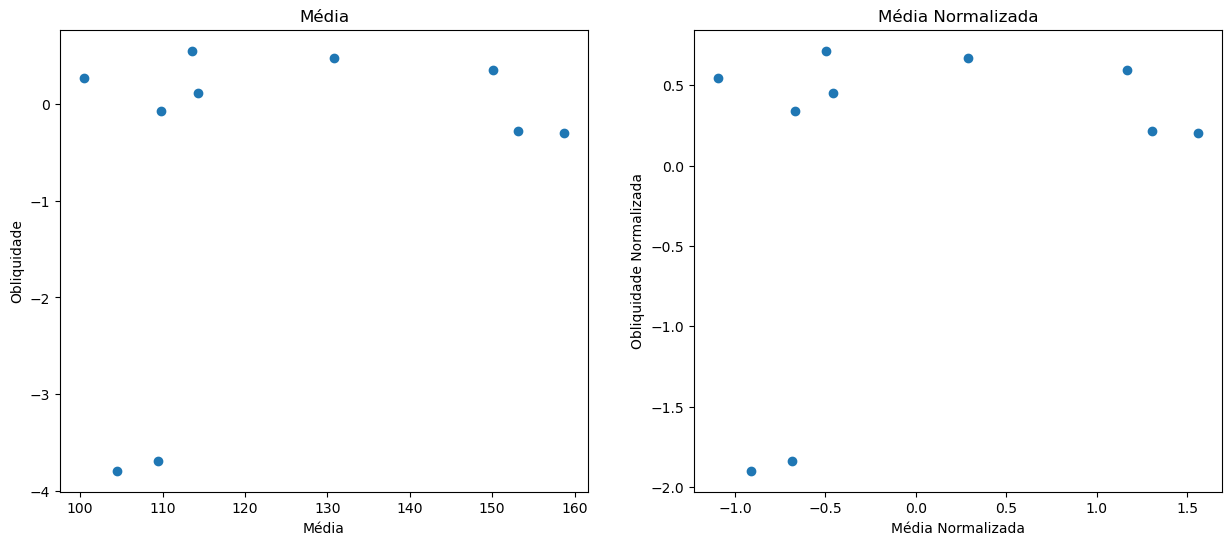

In [9]:
ske_norm = normaliza(ske, metodo='linear')
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1, title='Média')
plt.scatter(med, ske)
plt.xlabel('Média')
plt.ylabel('Obliquidade')

plt.subplot(1,2,2, title='Média Normalizada')
plt.scatter(med_norm, ske_norm)
plt.xlabel('Média Normalizada')
plt.ylabel('Obliquidade Normalizada')


## 2) ROC. Calcule a área embaixo da curva ROC para as características obtidas nas duas classes de astrocitomas descritas no exercício acima.

In [10]:
med

array([[114.36, 150.07],
       [100.44, 153.09],
       [109.42, 113.58],
       [109.75, 130.84],
       [104.41, 158.74]])

In [11]:
# Característica 1: Média
# Característica 2: Obliquidade

# Classe 1: Alto Grau
# Classe 2: Baixo Grau

from functions.ROC import ROC, AUC
from sklearn import metrics
media_alto_grau, media_baixo_grau = med[:, 0], med[:, 1]
obliquidade_alto_grau, obliquidade_baixo_grau = ske[:, 0], ske[:, 1]

mat = dados2
dados_ske_c1 = mat['ske'][:, 0]
dados_ske_c2 = mat['ske'][:, 1]
dados_med_c1 = mat['med'][:, 0]
dados_med_c2 = mat['med'][:, 1]

qtd_valores_por_rotulo = len(dados_ske_c1)
labels = [0] * qtd_valores_por_rotulo + [1] * qtd_valores_por_rotulo
scores_ske = list(dados_ske_c1) + list(dados_ske_c2)
FP, VP = ROC(scores_ske, labels)
print(f"auc ske minha: {AUC(VP, FP)}")
print(f"auc ske sklearn: {metrics.roc_auc_score(labels, scores_ske)}")
FP_sklearn, VP_sklearn, thresholds = metrics.roc_curve(labels, scores_ske)

auc ske minha: 0.76
auc ske sklearn: 0.76


## 3) PRÉ-PROCESSAMENTO, TESTE ESTATÍSTICO e ROC. Aplique as funções dos exercícios anteriores para: a) detectar outliers, b) normalizar os dados, c) realizar testes estatísticos e d) calcular a AUC para as características extraídas dos registros de EEG que foram introduzidos no exercício da aula 08. Em particular, atente à distinção das classes “vigília” e “estágio 4 do sono”: há alguma característica irrelevante nesta distinção? E na comparação entre “vigília” e “rem”, há alguma característica irrelevante? Quais características possuem maior AUC na distinção destas classes?

In [59]:
# Capturando dados do exercício da prática 2
vigilia = pd.read_pickle('../data/pratica_2/caracteristica_vigilia.pkl')
estagio1 = pd.read_pickle('../data/pratica_2/caracteristica_estagio1.pkl')
estagio2 = pd.read_pickle('../data/pratica_2/caracteristica_estagio2.pkl')
estagio3 = pd.read_pickle('../data/pratica_2/caracteristica_estagio3.pkl')
estagio4 = pd.read_pickle('../data/pratica_2/caracteristica_estagio4.pkl')
rem = pd.read_pickle('../data/pratica_2/caracteristica_rem.pkl')
classes = {
    'vigilia': vigilia,
    'e1': estagio1,
    'e2': estagio2,
    'e3': estagio3,
    'e4': estagio4,
    'rem': rem
}

In [60]:
remoutliers(rem['media'], 3, method='desvio')

[78, 79]

### Realizando para 1 classe (REM)

In [61]:
rem.apply(remoutliers, args=(3, 'desvio'))

media           [78, 79]
variancia        [9, 18]
mobilidade         [101]
complexidade          []
f-central             []
P na fc          [9, 72]
l-banda            [101]
f-margem           [101]
delta 1               []
delta 2         [90, 96]
teta 1                []
teta 2              [14]
alfa            [16, 73]
beta            [66, 84]
gama                  []
dtype: object

### Replicando para todas as classes ( Removendo outliers )

In [62]:
### Replicando para todas as classes ( Removendo outliers )
outliers = list(map(lambda classe: classe.apply(remoutliers, args=(3, 'desvio')), classes.values()))
number_of_outliers = list(map(lambda classe: len(classe.sum()), outliers))


In [63]:
number_of_outliers

[80, 15, 88, 10, 31, 16]

In [64]:
print(f'Total de outliers por classe: {number_of_outliers}')
print(f"Total de outliers considerando todas as classes: {sum(number_of_outliers)}")

Total de outliers por classe: [80, 15, 88, 10, 31, 16]
Total de outliers considerando todas as classes: 240


## Normalizando os dados

<AxesSubplot:title={'center':'Boxplot da média da classe REM'}>

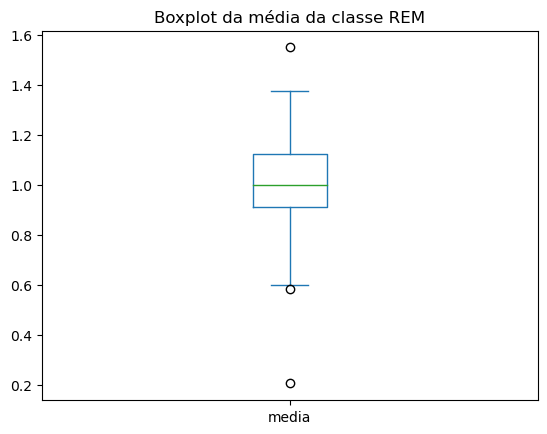

In [65]:
rem['media'].plot(kind='box', title='Boxplot da média da classe REM')

In [66]:
rem

,media,variancia,mobilidade,complexidade,f-central,P na fc,l-banda,f-margem,delta 1,delta 2,teta 1,teta 2,alfa,beta,gama
0,1.260984,201.818432,0.138836,1.296679,3.460053,91.493048,5.951773,7.905270,0.458736,0.117549,0.076921,0.066501,0.043662,0.024840,0.063010
1,0.856190,149.029648,0.157888,1.313815,3.747261,792.560351,6.336064,8.105404,0.439666,0.122306,0.065019,0.075498,0.044288,0.025798,0.072062
2,0.970508,183.960701,0.157530,1.248115,3.737551,1187.862054,6.171466,8.939293,0.390877,0.116590,0.094088,0.051978,0.047250,0.040931,0.086064
3,1.210889,109.164056,0.208083,1.314816,4.483855,213.534204,7.184718,10.073382,0.443295,0.096321,0.103003,0.063164,0.064070,0.038931,0.096336
4,0.984921,108.780268,0.191875,1.314923,4.419326,152.933277,6.828420,9.072715,0.426964,0.172170,0.115805,0.069895,0.035281,0.034292,0.088215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.991302,177.309331,0.166326,1.264882,4.145075,214.367453,6.244461,8.539026,0.410278,0.192114,0.104153,0.054202,0.050537,0.029164,0.077747
98,0.940540,107.257039,0.239968,1.296176,5.228816,987.368357,7.393211,11.340894,0.312872,0.197755,0.154243,0.073036,0.063957,0.037106,0.115782
99,0.969206,123.078488,0.241490,1.274044,5.493575,82.751290,7.269774,11.307538,0.262024,0.269721,0.143882,0.078910,0.076861,0.042642,0.116668
100,1.163175,200.098347,0.123136,1.284899,3.434240,2005.125817,5.535587,6.904603,0.432072,0.199464,0.113540,0.044921,0.040105,0.018097,0.051106


In [67]:
rem.apply(normaliza, args=('linear',))

,media,variancia,mobilidade,complexidade,f-central,P na fc,l-banda,f-margem,delta 1,delta 2,teta 1,teta 2,alfa,beta,gama
0,1.407377,0.461554,-0.694532,-0.337949,-0.653880,-0.640818,-0.681715,-0.471250,1.019069,-0.308116,-0.612002,0.298435,-0.415544,-0.447316,-0.628862
1,-0.856455,-0.233149,-0.405055,-0.072774,-0.389920,0.214458,-0.313998,-0.410251,0.732155,-0.215711,-0.994634,0.715219,-0.390826,-0.392035,-0.373920
2,-0.217128,0.226545,-0.410496,-1.089486,-0.398844,0.696712,-0.471498,-0.156087,-0.001888,-0.326745,-0.060153,-0.374368,-0.273862,0.481155,0.020389
3,1.127217,-0.757782,0.357596,-0.057288,0.287053,-0.491933,0.498056,0.189576,0.786756,-0.720453,0.226420,0.143840,0.390384,0.365732,0.309693
4,-0.136524,-0.762832,0.111335,-0.055624,0.227747,-0.565864,0.157124,-0.115420,0.541044,0.752865,0.637958,0.455653,-0.746494,0.098110,0.080988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-0.100838,0.139013,-0.276853,-0.830019,-0.024305,-0.490916,-0.401650,-0.278085,0.290005,1.140255,0.263375,-0.271332,-0.144035,-0.197812,-0.213837
98,-0.384727,-0.782878,0.842047,-0.345740,0.971716,0.452117,0.697558,0.575906,-1.175498,1.249830,1.873602,0.601175,0.385916,0.260466,0.857320
99,-0.224407,-0.574667,0.865176,-0.688238,1.215045,-0.651483,0.579444,0.565739,-1.940525,2.647713,1.540536,0.873294,0.895527,0.579855,0.882263
100,0.860372,0.438918,-0.933075,-0.520253,-0.677604,1.693744,-1.079952,-0.776247,0.617909,1.283024,0.565146,-0.701287,-0.556011,-0.836358,-0.964105


### Replicando normalização para todas as classes


In [86]:
list_norm_carac = list(map(lambda classe: classe.apply(normaliza, args=('linear',)), classes.values()))

In [88]:
list_norm_carac[0]

,media,variancia,mobilidade,complexidade,f-central,P na fc,l-banda,f-margem,delta 1,delta 2,teta 1,teta 2,alfa,beta,gama
0,0.438830,0.742012,-1.092140,1.117840,-1.178067,1.557216,-1.304131,-1.661349,0.626918,0.611216,-0.612951,-1.638718,-1.559187,-0.997993,-1.119289
1,0.414288,0.155817,-0.277550,0.488031,-0.291102,-0.649308,-0.064175,0.199568,0.442303,-0.306386,-0.066476,0.189544,-0.720391,-0.221591,-0.273618
2,1.160651,0.446312,0.633130,-0.645821,0.698725,-0.432081,0.777548,0.897796,-0.583989,-0.313923,0.610810,1.270016,0.578130,0.764945,0.696541
3,-1.552506,1.687106,0.412561,-0.328809,0.437898,-0.598612,0.634240,0.747077,0.116135,0.449973,0.025354,0.582001,-0.013513,0.528585,0.408811
4,0.376213,-0.918446,-0.332055,0.346289,-0.394994,-0.447129,-0.123874,0.107291,0.010961,-0.621641,-1.078512,0.274731,0.279159,-0.103939,-0.256287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-0.024518,-1.843544,2.573197,-1.944649,2.372207,-0.654065,2.062194,1.208462,-2.846873,-1.428544,-1.389049,-0.252851,1.005063,-0.276522,2.379130
476,-0.043920,-1.843487,2.532482,-1.683683,2.269934,-0.654550,2.149544,1.186930,-3.179194,-1.479145,-1.492885,-0.809055,0.142072,-0.794067,2.199092
477,-0.066619,-1.843856,3.578050,-3.623646,3.401934,-0.654509,2.067407,1.242297,-2.619254,-1.156930,-1.300641,-0.606098,1.681256,0.309678,3.321848
478,0.000897,-1.843289,1.966048,-0.812263,1.672183,-0.654505,1.993714,1.156172,-3.216871,-1.481422,-1.752198,-1.159670,0.237223,-0.903016,1.671373


In [69]:
vigilia_normalizada = vigilia.apply(normaliza, args=('linear',))

Text(0, 0.5, 'Obliquidade Normalizada')

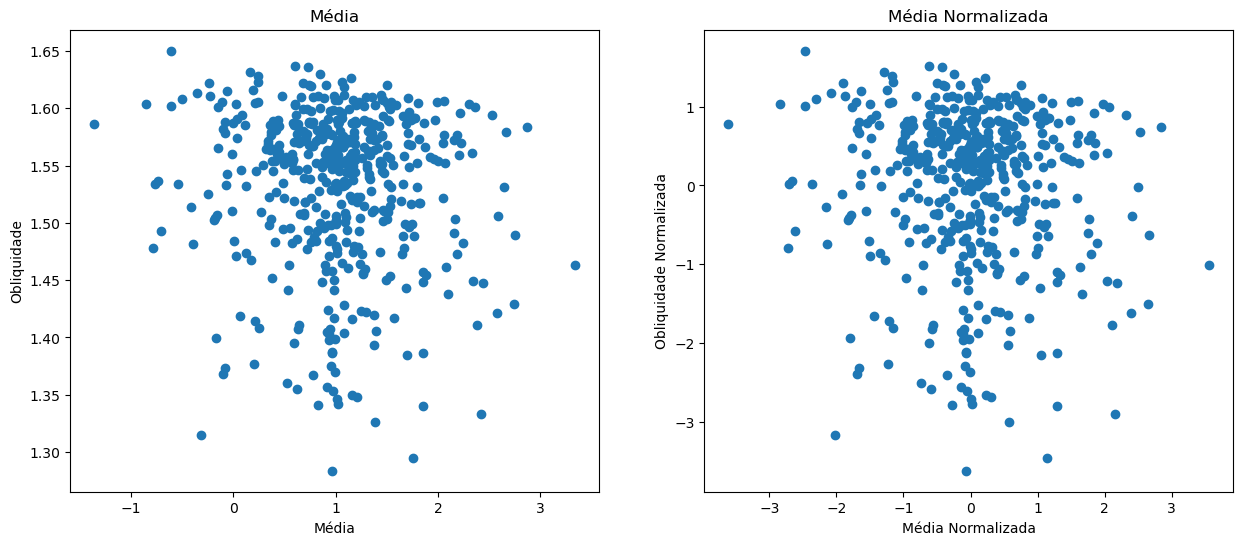

In [70]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1, title='Média')
plt.scatter(vigilia.media, vigilia.complexidade)
plt.xlabel('Média')
plt.ylabel('Obliquidade')

plt.subplot(1,2,2, title='Média Normalizada')
plt.scatter(vigilia_normalizada.media, vigilia_normalizada.complexidade)
plt.xlabel('Média Normalizada')
plt.ylabel('Obliquidade Normalizada')


In [71]:
# Realizando teste estatístico para verificar se as características são diferentes entre as classes
from scipy.stats import shapiro, ttest_ind
from itertools import combinations
# Teste-t de Student
# H0: As classes são iguais
# H1: As classes são diferentes
# Se p-valor < 0.05, rejeita-se H0
# Se p-valor > 0.05, não rejeita-se H0

for classe1, classe2 in combinations(classes.keys(), 2):
    print(f'Teste t de Student para as classes {classe1} e {classe2}')
    t, p = ttest_ind(classes[classe1].media, classes[classe2].media)
    print(f'p-valor: {p}')
    if p < 0.05:
        print('Rejeita-se H0')
    else:
        print('Não rejeita-se H0')

print("-"*50)

# VERIFICANDO APENAS A MÉDIA, porém precisa verificar as outras características

Teste t de Student para as classes vigilia e e1
p-valor: 0.8251590256601273
Não rejeita-se H0
Teste t de Student para as classes vigilia e e2
p-valor: 0.6633190792199715
Não rejeita-se H0
Teste t de Student para as classes vigilia e e3
p-valor: 0.965145239285953
Não rejeita-se H0
Teste t de Student para as classes vigilia e e4
p-valor: 0.9962382039319545
Não rejeita-se H0
Teste t de Student para as classes vigilia e rem
p-valor: 0.9847125126165897
Não rejeita-se H0
Teste t de Student para as classes e1 e e2
p-valor: 0.2745187345313976
Não rejeita-se H0
Teste t de Student para as classes e1 e e3
p-valor: 0.6974649809655851
Não rejeita-se H0
Teste t de Student para as classes e1 e e4
p-valor: 0.7794836070048612
Não rejeita-se H0
Teste t de Student para as classes e1 e rem
p-valor: 0.5771566225109309
Não rejeita-se H0
Teste t de Student para as classes e2 e e3
p-valor: 0.7962866807061507
Não rejeita-se H0
Teste t de Student para as classes e2 e e4
p-valor: 0.6286807693115649
Não rejeita-s

## Seleção de características

Procedimento de seleção escalar:
1. Calcule algum critério Mk de separação entre classes para cada característica k. (Exemplo Mk = AUC)
2. Encontre a característica com maior valor do critério. Suponha que k1 seja esta característica.
3. Para as demais características (k != k1), calcule um novo critério Mk¹ da seguinte forma: Mk¹ = alpha*Mk - beta*correlação, onde alpha e beta regulam quanta força eu dou para a correlação e para o critério original. (Exemplo: alpha = 1, beta = 0.5)
4. Encontre a característica com maior valor do critério Mk¹. Suponha que k2 seja esta característica.
5. Para as demais características (k != k1 e k != k2), calcule um novo critério Mk² da seguinte forma: Mk² = alpha*Mk¹ - beta*(|correlacao(k,k1)| + correlacao(k,k2))/2, onde alpha e beta regulam quanta força eu dou para a correlação e para o critério original. (Exemplo: alpha = 1, beta = 0.5)
6. Encontre a característica com maior valor do critério. Suponha que k3 seja esta característica.

Continue até selecionar o número de características desejado.

In [72]:
rem.shape

(102, 15)

In [73]:
for classe1, classe2 in combinations(classes.values(), 2):
    x, y = preselec(classe1.to_numpy(), classe2.to_numpy(), alfa=0.05)



Erro: matrizes devem ter o mesmo numero de caracteristicas!


TypeError: cannot unpack non-iterable NoneType object

In [74]:
len(estagio3)

35

In [75]:
rem

,media,variancia,mobilidade,complexidade,f-central,P na fc,l-banda,f-margem,delta 1,delta 2,teta 1,teta 2,alfa,beta,gama
0,1.260984,201.818432,0.138836,1.296679,3.460053,91.493048,5.951773,7.905270,0.458736,0.117549,0.076921,0.066501,0.043662,0.024840,0.063010
1,0.856190,149.029648,0.157888,1.313815,3.747261,792.560351,6.336064,8.105404,0.439666,0.122306,0.065019,0.075498,0.044288,0.025798,0.072062
2,0.970508,183.960701,0.157530,1.248115,3.737551,1187.862054,6.171466,8.939293,0.390877,0.116590,0.094088,0.051978,0.047250,0.040931,0.086064
3,1.210889,109.164056,0.208083,1.314816,4.483855,213.534204,7.184718,10.073382,0.443295,0.096321,0.103003,0.063164,0.064070,0.038931,0.096336
4,0.984921,108.780268,0.191875,1.314923,4.419326,152.933277,6.828420,9.072715,0.426964,0.172170,0.115805,0.069895,0.035281,0.034292,0.088215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.991302,177.309331,0.166326,1.264882,4.145075,214.367453,6.244461,8.539026,0.410278,0.192114,0.104153,0.054202,0.050537,0.029164,0.077747
98,0.940540,107.257039,0.239968,1.296176,5.228816,987.368357,7.393211,11.340894,0.312872,0.197755,0.154243,0.073036,0.063957,0.037106,0.115782
99,0.969206,123.078488,0.241490,1.274044,5.493575,82.751290,7.269774,11.307538,0.262024,0.269721,0.143882,0.078910,0.076861,0.042642,0.116668
100,1.163175,200.098347,0.123136,1.284899,3.434240,2005.125817,5.535587,6.904603,0.432072,0.199464,0.113540,0.044921,0.040105,0.018097,0.051106


In [76]:
# Teste de Shapiro-Wilk
# H0: A amostra é proveniente de uma distribuição normal
# H1: A amostra não é proveniente de uma distribuição normal
# Se p-valor < 0.05, rejeita-se H0
# Se p-valor > 0.05, não rejeita-se H0
print("-" * 50)
for classe in classes.keys():
    print(f"Teste de Shapiro-Wilk para a classe {classe}")
    print(shapiro(classes[classe].media))

# VERIFICANDO APENAS A MÉDIA, porém precisa verificar as outras características


--------------------------------------------------
Teste de Shapiro-Wilk para a classe vigilia
ShapiroResult(statistic=0.9884855151176453, pvalue=0.000786350981798023)
Teste de Shapiro-Wilk para a classe e1
ShapiroResult(statistic=0.7962417006492615, pvalue=2.2748726280497067e-07)
Teste de Shapiro-Wilk para a classe e2
ShapiroResult(statistic=0.9402286410331726, pvalue=9.979930076786658e-12)
Teste de Shapiro-Wilk para a classe e3
ShapiroResult(statistic=0.963626503944397, pvalue=0.2929205596446991)
Teste de Shapiro-Wilk para a classe e4
ShapiroResult(statistic=0.9894242286682129, pvalue=0.6252410411834717)
Teste de Shapiro-Wilk para a classe rem
ShapiroResult(statistic=0.9529937505722046, pvalue=0.0011506042210385203)


### Calculando ROC

In [91]:
list_norm_carac[0].T.shape

(15, 480)

In [93]:
vigilia_normalizada = list_norm_carac[0]
estagio4_normalizada = list_norm_carac[4]


In [112]:
carac_rel_vxe4, pval_vxe4 = preselec(vigilia.to_numpy().T, estagio4.to_numpy().T, alfa=0.05)

Aviso: normalidade rejeitada para a caracteristica nº 1
Aviso: normalidade rejeitada para a caracteristica nº 2
Aviso: normalidade rejeitada para a caracteristica nº 3
Aviso: normalidade rejeitada para a caracteristica nº 4
Aviso: normalidade rejeitada para a caracteristica nº 5
Aviso: normalidade rejeitada para a caracteristica nº 6
Aviso: normalidade rejeitada para a caracteristica nº 7
Aviso: normalidade rejeitada para a caracteristica nº 8
Aviso: normalidade rejeitada para a caracteristica nº 9
Aviso: normalidade rejeitada para a caracteristica nº 10
Aviso: normalidade rejeitada para a caracteristica nº 11
Aviso: normalidade rejeitada para a caracteristica nº 12
Aviso: normalidade rejeitada para a caracteristica nº 13
Aviso: normalidade rejeitada para a caracteristica nº 14
Aviso: normalidade rejeitada para a caracteristica nº 15


In [116]:
# Verificar características que são não significativas
x = list(filter(lambda x: x not in carac_rel_vxe4, range(0, len(carac_rel_vxe4) + 1)))
print(f"Características não significativas entre vigilia e estagio4: {vigilia.columns[x]}, p-valor: {pval_vxe4[x]}")

Características não significativas entre vigilia e estagio4: Index(['media', 'variancia'], dtype='object'), p-valor: [0.98262767 0.1880465 ]


In [118]:
carac_rel_vxr, pval_vxr = preselec(vigilia.to_numpy().T, rem.to_numpy().T, alfa=0.05)

Aviso: normalidade rejeitada para a caracteristica nº 1
Aviso: normalidade rejeitada para a caracteristica nº 2
Aviso: normalidade rejeitada para a caracteristica nº 3
Aviso: normalidade rejeitada para a caracteristica nº 4
Aviso: normalidade rejeitada para a caracteristica nº 5
Aviso: normalidade rejeitada para a caracteristica nº 6
Aviso: normalidade rejeitada para a caracteristica nº 7
Aviso: normalidade rejeitada para a caracteristica nº 8
Aviso: normalidade rejeitada para a caracteristica nº 9
Aviso: normalidade rejeitada para a caracteristica nº 10
Aviso: normalidade rejeitada para a caracteristica nº 11
Aviso: normalidade rejeitada para a caracteristica nº 12
Aviso: normalidade rejeitada para a caracteristica nº 13
Aviso: normalidade rejeitada para a caracteristica nº 14
Aviso: normalidade rejeitada para a caracteristica nº 15


In [119]:
y = list(filter(lambda x: x not in carac_rel_vxr, range(0, len(carac_rel_vxr) + 1)))
print(f"Características não significativas entre vigilia e rem: {vigilia.columns[y]}, p-valor: {pval_vxr[y]}")

Características não significativas entre vigilia e rem: Index(['media'], dtype='object'), p-valor: [0.95553184]


## Calculando AUC

Aplicar ROC


In [122]:
# Aplicar ROC para cada característica entre as classes
from sklearn.metrics import roc_curve, auc

# Característica média
dados_ske_c1



array([ 0.11,  0.27, -3.69, -0.07, -3.79])

In [154]:
vetor_vigilia_media = vigilia.media.to_numpy()
vetor_estagio4_media = estagio4.media.to_numpy()

In [155]:
qtd_valores_vetor_vigilia_media = len(vetor_vigilia_media)
qtd_valores_vetor_e4_media = len(vetor_estagio4_media)
labels_vxe4 = [0] * qtd_valores_vetor_vigilia_media + [1] * qtd_valores_vetor_e4_media
scores_vxe4 = list(vetor_vigilia_media) + list(vetor_estagio4_media)

In [156]:
FP_vxe4, VP_vxe4 = ROC(scores_vxe4, labels_vxe4)

In [157]:
round(AUC(VP_vxe4,FP_vxe4), 4)

0.5007

In [162]:
def calcula_AUC(
    caracteristica_um: np.array,
    caracteristica_dois: np.array
    ) -> float:
    c1_len, c2_len = len(caracteristica_um), len(caracteristica_dois)
    labels = [0] * c1_len + [1] * c2_len
    scores = list(caracteristica_um) + list(caracteristica_dois)
    FP, VP = ROC(scores, labels)
    return round(AUC(VP, FP), 4)

In [161]:
list(rem.columns)

['media',
 'variancia',
 'mobilidade',
 'complexidade',
 'f-central',
 'P na fc',
 'l-banda',
 'f-margem',
 'delta 1',
 'delta 2',
 'teta 1',
 'teta 2',
 'alfa',
 'beta',
 'gama']

In [170]:
def calcula_AUC_todas_caracteristicas(
    classe1: pd.DataFrame,
    classe2: pd.DataFrame
    ) -> dict:
    response_auc = dict()
    caracteristicas = list(classe1.columns)
    for caracteristica in caracteristicas:
        c1, c2 = classe1[caracteristica], classe2[caracteristica]
        response_auc[caracteristica] = (
            calcula_AUC(c1.to_numpy(), c2.to_numpy())
        )
    return response_auc


In [171]:
calcula_AUC_todas_caracteristicas(estagio4, vigilia)

{'media': 0.4993,
 'variancia': 0.542,
 'mobilidade': 1.0,
 'complexidade': 0.9988,
 'f-central': 1.0,
 'P na fc': 0.0501,
 'l-banda': 1.0,
 'f-margem': 1.0,
 'delta 1': 0.0,
 'delta 2': 0.97,
 'teta 1': 0.9769,
 'teta 2': 0.9971,
 'alfa': 0.9995,
 'beta': 1.0,
 'gama': 1.0}

In [172]:
calcula_AUC_todas_caracteristicas(rem, vigilia)

{'media': 0.5018,
 'variancia': 0.9478,
 'mobilidade': 0.9683,
 'complexidade': 0.9793,
 'f-central': 0.9186,
 'P na fc': 0.69,
 'l-banda': 0.9951,
 'f-margem': 0.9202,
 'delta 1': 0.6493,
 'delta 2': 0.3952,
 'teta 1': 0.1621,
 'teta 2': 0.0471,
 'alfa': 0.1219,
 'beta': 0.6146,
 'gama': 0.8759}